# Description
The following project aims to illustrate how machine learning can be applied in the medical world by analyzing patient data surrounding the measurement of cell nuclei to determine if the patient has cancer cells. This project is simply meant to predict whether the patient's cells will be classified as malignant or benign.

Before new patient data is analyzed, three machine learning methods (random forest, support vectors, and naive bayes) will be trained and tested to determine which method performs the best in this scenario. Their performances will be analyzed using F1 scores.

The dataset used to train the models was found on the Kaggle website at https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

# Set up: Add packages and retrieve data

In [3]:
# importing required packages
import pandas as pd # will be used throughout the project
import matplotlib as plt # will be used in data exploration stage
import numpy as np # will be used in data exploration stage

In [4]:
# importing required scikit-learn packages for machine learning
from sklearn.ensemble import RandomForestClassifier # used to access random forest ML method
from sklearn.model_selection import train_test_split # used to set training and testing paramters for model
from sklearn.metrics import accuracy_score, classification_report # used to check and understand results of project

read data, which was downloaded from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

In [6]:
# retrieve data from saved csv file
data = pd.read_csv("data.csv")

drop unneccessary column

In [8]:
data = data.drop('Unnamed: 32', axis=1)

In [9]:
# print data
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [10]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Exploration

split dataset into two; one for benign diagnoses and one for malignant

In [13]:
benign = data[data["diagnosis"] == 'B']
malignant = data[data["diagnosis"] == 'M']

In [14]:
print(benign)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
37     854941         B       13.030         18.42           82.61      523.8   
46   85713702         B        8.196         16.84           51.71      201.9   
..        ...       ...          ...           ...             ...        ...   
558    925277         B       14.590         22.68           96.39      657.1   
559    925291         B       11.510         23.93           74.52      403.5   
560    925292         B       14.050         27.15           91.38      600.4   
561    925311         B       11.200         29.37           70.67      386.0   
568     92751         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compa

In [15]:
print(malignant)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compa

In [16]:
print("Benign description:")
benign.describe()

Benign description:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [17]:
print("Malignant description:")
malignant.describe()

Malignant description:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


Just by analyzing the two dataframes, it can be inferred that the cell nuclei of malignant patients have higher measurements than those who are benign. In some cases it's only a smal difference, in others it's a large difference. While this doesn't play a role in predicting the diagnosis, it gives important background information and illustrates how the two cell types differ.

# Setting Parameters

import train_test_split and f1_scores

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

set the x (feature) and y (labeled) value

the feature values are the data catergories that will be used to determine our diagnosis

the labeled value will be our end result which is the actual diagnosis of M (malignant) or B (benign)

In [23]:
# features are every column but 'diagnosis'
X = data.drop("diagnosis", axis=1)

# label is the diagnosis column
y = data['diagnosis']

split data into training and testing data

In [25]:
# 70% of data will be used to train, 30% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifier Models

now it's time to train our models

all classifiers will follow the following pattern
1) classifier will be imported from sklearn.ensemble
2) classifier object created
3) classifier is trained using .fit()
4) model is tested using .predict()
5) F1 scores are taken to review performance (in final section)

Important: the random forest classifier will have a extra step to hyper tune since the number of trees can be modified and the modifying the value can affect the model's performance

# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

create random forest classifier objects

since random forest relies on multiple decision trees, lets add a hyper tuning step where we test different number of trees (n_estimators) to see which performs the best

lets start with 50, 100, and 500

In [33]:
rf_cls1 = RandomForestClassifier(n_estimators=50, random_state=42)
rf_cls2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls3 = RandomForestClassifier(n_estimators=500, random_state=42)

In [34]:
rf_cls1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [35]:
rf_cls2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
rf_cls3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [37]:
prediction1 = rf_cls1.predict(X_test)
prediction2 = rf_cls2.predict(X_test)
prediction3 = rf_cls3.predict(X_test)

In [38]:
f1_1 = f1_score(y_test, prediction1, average='macro')
f1_2 = f1_score(y_test, prediction2, average='macro')
f1_3 = f1_score(y_test, prediction3, average='macro')

print("with 50", f1_1, "\nwith 100", f1_2, "\nwith 500", f1_3)

with 50 0.9682592716338122 
with 100 0.97469665581533 
with 500 0.9682592716338122


the model based on 100 trees has the best f1_score

since we can see that the scores start to go back down eventually, can reasonably infer that the best n_estimator value is between 50 and 500

In [41]:
best_f1_score = f1_2
best_n_estimator = 100

for x in range(50, 501):
    rf_cls = RandomForestClassifier(n_estimators=x, random_state=42)

    rf_cls.fit(X_train, y_train)

    prediction = rf_cls.predict(X_test)

    f1 = f1_score(y_test, prediction, average='macro')

    if f1 > best_f1_score:
        best_f1_score = f1
        best_n_estimator = x

print("F1 Score", best_f1_score, "with", best_n_estimator, "trees")

F1 Score 0.97469665581533 with 100 trees


In [42]:
rf_f1 = best_f1_score

# Support Vectors

In [44]:
from sklearn import svm

create support vector classifier object

In [46]:
sv_cls = svm.SVC()

train classifier using .fit()

In [48]:
sv_cls.fit(X_train, y_train)

SVC()

test using .predict() and testing data

In [50]:
sv_prediction = sv_cls.predict(X_test)

retrieve f1 score

In [52]:
sv_f1 = f1_score(y_test, sv_prediction, average='macro')
print(sv_f1)

0.3870967741935484


# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

make naive bayes object

In [56]:
gnb_cls = GaussianNB()

train classifier using .fit()

In [58]:
gnb_cls.fit(X_train, y_train)

GaussianNB()

In [59]:
gnb_prediction = gnb_cls.predict(X_test)

predict using .predict()

In [61]:
gnb_f1 = f1_score(y_test, gnb_prediction, average='macro')
print(gnb_f1)

0.4179841897233202


# Analyze Performances
Lets analyze the performance of each method to see which one is the best in this given situation and which one should be used in the future with new patient data.

These performances are being analyzed by looking at the F1 score as they take precision and recall into account. The "macro" average was choosen as it treats each result as the same, while a "weighted" average would have leaned more towards the result that occurs the most. As every dataset is different and has different diagnoses, "macro" was the best option.

import matplotlib to visually see F1 scores

In [64]:
import matplotlib.pyplot as plt

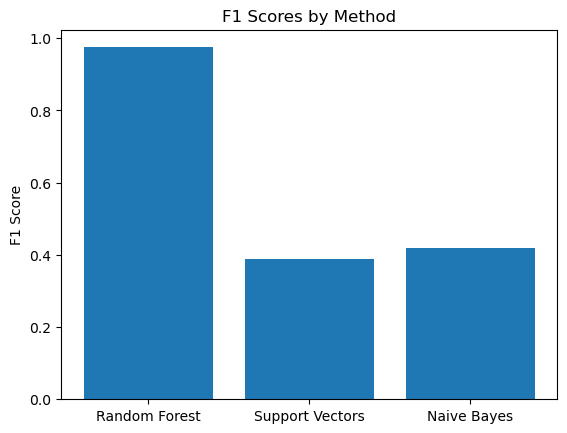

In [65]:
# x-axis of graph
models = ['Random Forest', 'Support Vectors', 'Naive Bayes']

# y-axis values of graph
scores = [rf_f1, sv_f1, gnb_f1]

fig, ax = plt.subplots()

# plot bar graph
ax.bar(models, scores)

# set title and label axis
ax.set_title("F1 Scores by Method")
ax.set_ylabel("F1 Score")

plt.show()

From the data and the bar graph above, it can be seen that random forest was the classification method that performed the best as seen by its high F1 score. This doesn't mean it's always the best option, but for this project it is, and will be used for any new patient data to make predictions.

# Diagnose Patient
The following shows how a patient/doctor can enter patient data to predict a diagnosis. Values similar to entry #1 in the inputted data will be used.

In [68]:
random_forest = RandomForestClassifier(n_estimators=best_n_estimator, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
print("Please enter measurements as asked. Note: This project is simply meant to predict whether cancer cells are benign or malignant. \nThis should not be treated as a doctor or a real test. Please see a real doctor and conduct real tests for accurate results")
measurements = data.columns.tolist()
del measurements[1] # delete diagnosis from list

new_data = pd.DataFrame(columns=measurements)

Please enter measurements as asked. Note: This project is simply meant to predict whether cancer cells are benign or malignant. 
This should not be treated as a doctor or a real test. Please see a real doctor and conduct real tests for accurate results


In [70]:
print("Please make sure you enter numerical values:")
patient_values = [0]

# ask for all category values except for id (which is '0' by default)
for x in measurements[1:]:
    while True:
        try:
            value = float(input(x))
            break
        except ValueError:
            print("Please enter numerical value. Try Again!")
        
    patient_values.append(value)


Please make sure you enter numerical values:


radius_mean 18.0
texture_mean 10.338
perimeter_mean 123
area_mean 1010
smoothness_mean 0.12
compactness_mean 0.2889
concavity_mean 0.3111
concave points_mean 0.15
symmetry_mean 0.25
fractal_dimension_mean 0.0789
radius_se 1.09
texture_se 0.905
perimeter_se 8.59
area_se 154
smoothness_se 0.0067
compactness_se 0.049
concavity_se 0.055
concave points_se 0.0220
symmetry_se 0.04
fractal_dimension_se 0.00509
radius_worst 28
texture_worst 14
perimeter_worst 185
area_worst 2010
smoothness_worst 0.18
compactness_worst 0.67
concavity_worst 0.78
concave points_worst 0.29
symmetry_worst 0.43
fractal_dimension_worst 0.13


In [71]:
new_data.loc[len(new_data)] = patient_values

In [72]:
new_data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,18.0,10.338,123.0,1010.0,0.12,0.2889,0.3111,0.15,0.25,...,28.0,14.0,185.0,2010.0,0.18,0.67,0.78,0.29,0.43,0.13


In [73]:
prediction = random_forest.predict(new_data)

In [74]:
print("Prediction: (M = malignant, B = benign)")
print(prediction)

Prediction: (M = malignant, B = benign)
['M']


This sample data that was inputted yields a malignant diagnosis, which was expected as the values entered were purposely similar to those in data entry #1 from the dataset, which also was diagnosed malignant.